In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import pearsonr

In [78]:
df = pd.read_csv("test.csv")

In [79]:
df['Density'] = df['Nbs'] / (df['N2'] + df['Nbs'])
df['(B-V)0'] = pd.to_numeric(df['(B-V)0'], errors='coerce')
df['E(B-V)'] = pd.to_numeric(df['E(B-V)'], errors='coerce')
df['log(Age)'] = pd.to_numeric(df['log(Age)'], errors='coerce')
df['Density'] = pd.to_numeric(df['Density'], errors='coerce')

In [80]:
df = df.dropna()

In [95]:
X = df[['log(Age)', '(B-V)0']]
y = df['Nbs']

In [96]:
# Splitting a data set into training and testing models.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

     log(Age)  (B-V)0
209      7.70   -0.15
74       7.10   -0.23
283      7.60   -0.15
191      6.50   -0.31
387      7.00   -0.35
..        ...     ...
234      7.77    0.00
290      6.50   -0.30
52       8.63   -0.13
360      6.78   -0.43
207      6.34   -0.35

[81 rows x 2 columns]
209    1
74     2
283    0
191    0
387    0
      ..
234    1
290    0
52     0
360    0
207    0
Name: Nbs, Length: 81, dtype: int64
     log(Age)  (B-V)0
100      8.80    0.12
282      8.80    0.00
245      7.80   -0.15
196      7.90   -0.16
175      7.10   -0.20
147      7.99    0.00
353      7.95   -0.13
194      8.00   -0.17
43       8.70    0.45
9        9.70    0.58
67       7.06   -0.30
109      9.78    0.34
377      8.36   -0.05
342      9.78    0.46
312      9.80    0.61
13       7.90   -0.12
316      9.10    0.26
118      7.10   -0.15
49       7.40   -0.20
89       6.00   -0.35
395      7.00   -0.26
100     2
282     1
245     0
196     0
175     0
147     2
353     2
194     1
43      1
9   

In [97]:
k_values = range(1, 11)
cv_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(scores.mean())

# Convert scores to positive values
cv_scores = [-score for score in cv_scores]

# Find the best k (the one with the lowest mean squared error)
best_k = k_values[np.argmin(cv_scores)]
print(f'Best k value: {best_k}')

Best k value: 7


In [98]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [99]:
y_pred = knn.predict(X_test)

In [100]:
print(y_pred)
print(y_test)

[ 1.28571429  1.28571429  0.85714286  0.71428571  0.85714286  1.14285714
  1.42857143  1.28571429  5.         23.28571429  1.14285714 22.14285714
  1.85714286 23.85714286 23.85714286  0.71428571  8.28571429  0.85714286
  1.71428571  0.          0.85714286]
100     2
282     1
245     0
196     0
175     0
147     2
353     2
194     1
43      1
9      20
67      0
109    19
377     1
342     1
312     5
13      1
316     1
118     1
49      4
89      0
395     0
Name: Nbs, dtype: int64


In [101]:
mse = mean_squared_error(y_test, y_pred)
correlation = np.corrcoef(y_test, y_pred)[0,1]
pearson_corr, _ = pearsonr(y_test, y_pred)
print(correlation)

0.7007074947248514


In [102]:
test_results = X_test.copy()
test_results['Density'] = y_test
test_results['Avg_Density'] = y_pred

In [103]:
vmin = min(df['Nbs'].min(), y_pred.min())
vmax = max(df['Nbs'].max(), y_pred.max())

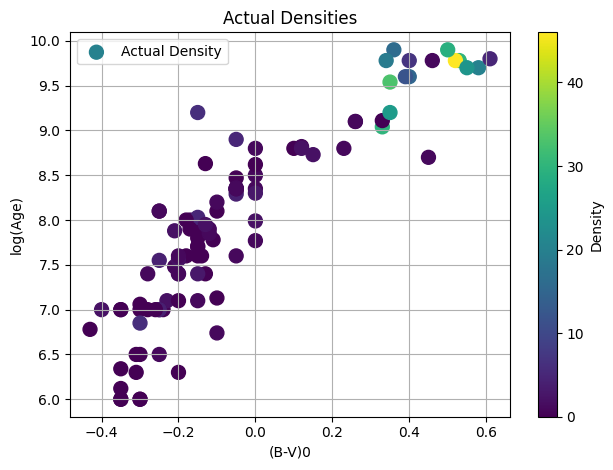

In [104]:
scatter = plt.scatter(df['(B-V)0'], df['log(Age)'], c=df['Nbs'], cmap='viridis', s=100, label='Actual Density')
plt.colorbar(scatter, label='Density')
plt.xlabel('(B-V)0')
plt.ylabel('log(Age)')
plt.title('Actual Densities')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
test_results

,log(Age),(B-V)0,Density,Avg_Density
100,8.80,0.12,2,1.285714
282,8.80,0.00,1,1.285714
245,7.80,-0.15,0,0.857143
196,7.90,-0.16,0,0.714286
175,7.10,-0.20,0,0.857143
147,7.99,0.00,2,1.142857
353,7.95,-0.13,2,1.428571
194,8.00,-0.17,1,1.285714
43,8.70,0.45,1,5.000000
9,9.70,0.58,20,23.285714


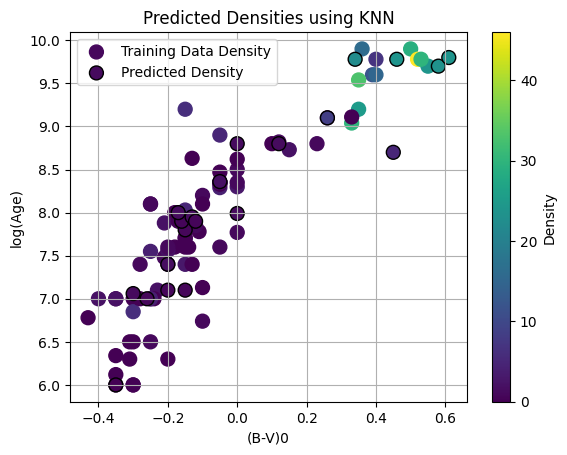

In [16]:
scatter = plt.scatter(X_train['(B-V)0'], X_train['log(Age)'], c=y_train, cmap='viridis', s=100, label='Training Data Density', vmin = vmin, vmax = vmax)
scatter = plt.scatter(X_test['(B-V)0'], X_test['log(Age)'], c=y_pred, cmap='viridis', s=100, label='Predicted Density', edgecolor='k', vmin=vmin, vmax=vmax)
plt.colorbar(scatter, label='Density')
plt.xlabel('(B-V)0')
plt.ylabel('log(Age)')
plt.title('Predicted Densities using KNN')
plt.legend()
plt.grid(True)